In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
print(torch.__version__)

2.4.1


# 神经网络
## 神经元
作用: 接受输入信号, 通过加权求和之后和偏置相加, 之后通过激活函数处理以产生输出
线性神经网络中一个简单的神经元的结构如下:
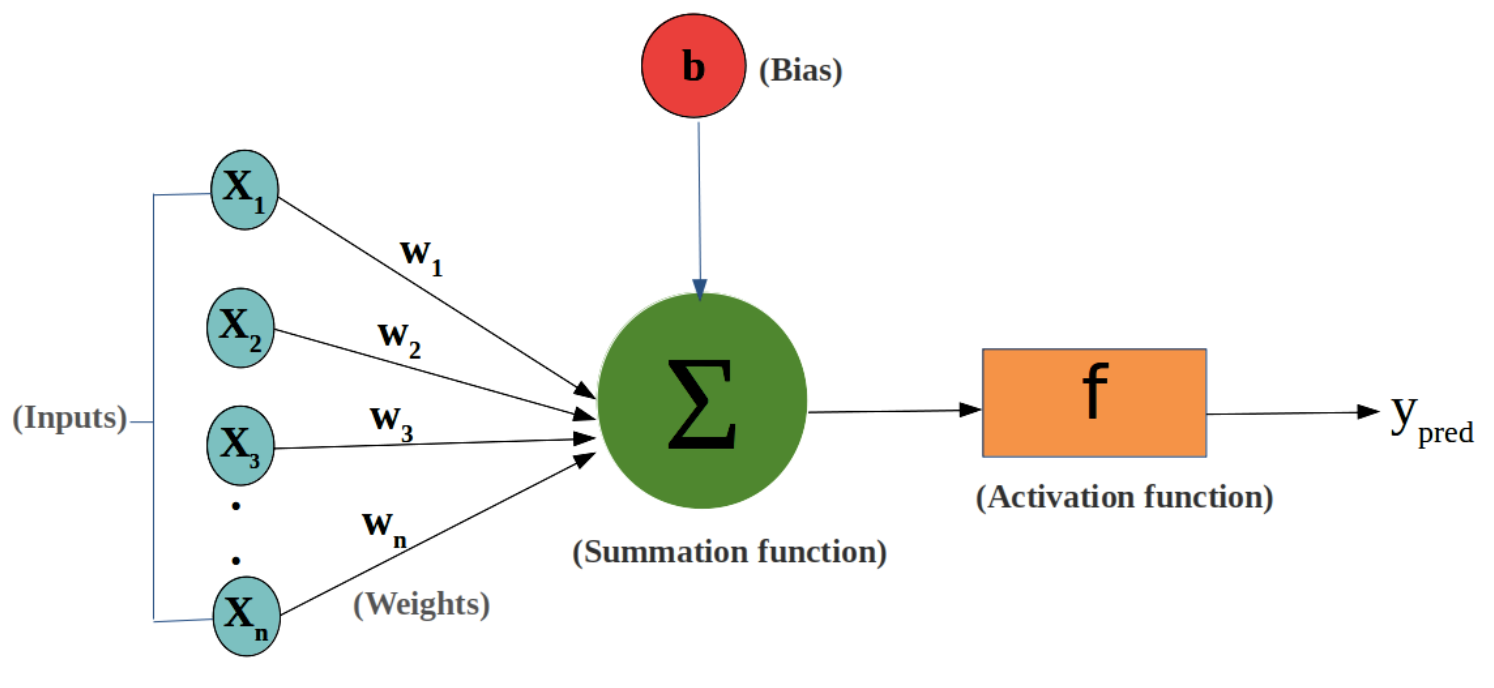
其中 `f` 为激活函数
## 层
神经网络有多个层组成, 每一个层由多个神经元组成, 层分为:
- 输入层: 接受原始输入数据
- 隐藏层: 对输入数据进行处理, 可以有多个隐藏层
- 输出层: 产生最终的输出结果
非常典型的神经网络架构如下:
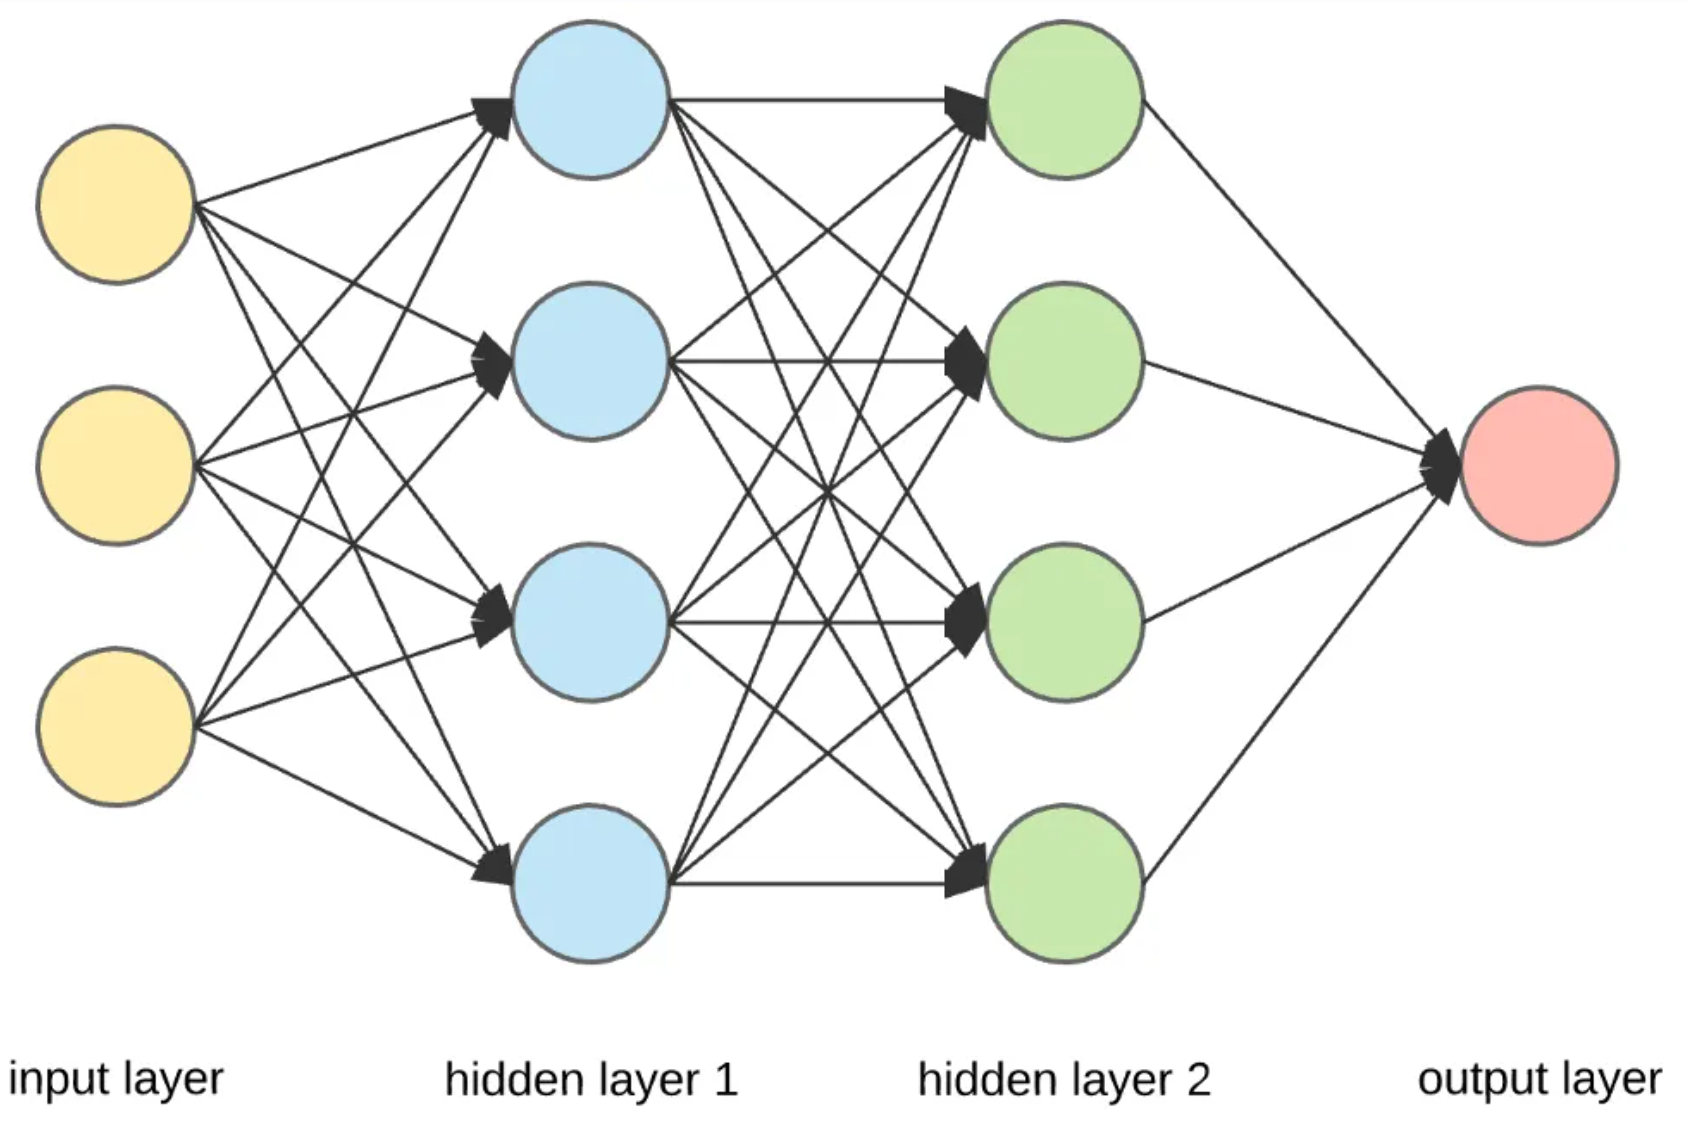

## 分类
同时神经网络分为:
1. 前馈神经网络(线性神经网络)
2. 卷积神经网络(`CNN`)
3. 循环神经网络(`RNN`)

## torch.nn
> `torch.nn` 模块提供了各种网络层(比如全连接层, 卷积层等), 损失函数和优化器
在 `PyTorch` 中, 构造的神经网络需要继承 `nn.Module` 类, 同时需要自己实现构造函数, 以及 `foward` 函数, 构造函数中需要初始化需要使用的层, `forward` 函数接受输入, 并且利用创建的层来构造输出

In [5]:
# 1. 一个简单的线性神经网络
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 2) # 输入 2 个特征, 输出两个特征
        self.fc2 = nn.Linear(2, 1) # 输入 2 个特征, 输出 1 一个预测值
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
# 2. 创建模型实例
model = SimpleNN()

print(model)

SimpleNN(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)


## 神经网络层
在 `torch` 和 `torch.nn.Functional` 中提供了各种常见的神经网络层, 比如几个常见的神经网络层如下:
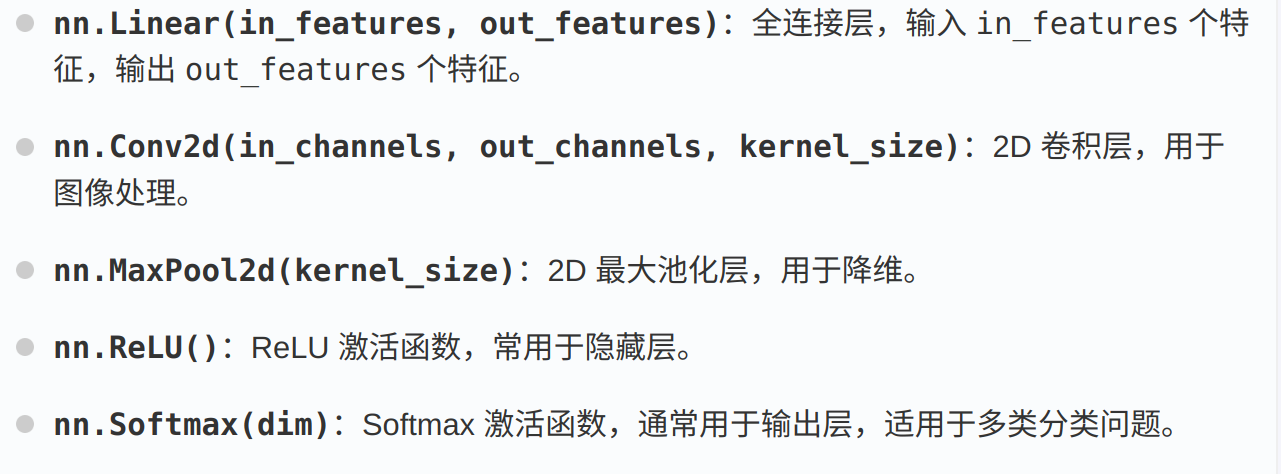

## 激活函数
> 如果没有激活函数, 那么多个层之间相当于直接连接, 那么一定可以使用一个层等效这些层的效果
激活函数为非线性函数, 常见的激活函数包括:
1. `Sigmoid`: 用于二分类问题, 输入值在 `0` 和 `1` 之间
2. `Tanh`: 输入值在 `-1 - 1` 之间, 用于输出层之间
3. `ReLU`: `f(x) = max(0, x)`, 用于解决梯度消失问题
4. `Softmax`: 可以用于多分类问题的输出层, 把输出转换为概率分布

## 损失函数(Loss Function)
在 `torch.nn` 中提供了各种损失函数, 常见的损失函数如下:
1. 平方误差(`MSELoss`): 可以用于回归问题, 计算输出和目标值的平方差
2. 交叉熵误差(`CrossEntropyLoss`): 常用于分类问题, 计算输出和实际标签之间的交叉熵(`KL` 散度)
3. `BECWithLogitsLoss`: 二分类问题, 结合 `Sigmoid` 激活和二元交叉熵损失

## 优化器(Optimizer)
> 用于训练过程中更新网络权重和偏置, 优化器相关函数一般在 `torch.optim` 中, 一般用于模型参数的优化, 需要设置相应的学习率
常见的优化器包括:
- `SGD`: 随机梯度下降
- `Adam`: 自适应矩估计
- `RMSprop`: 均方根传播

## 训练过程
神经网络的训练过程如下:
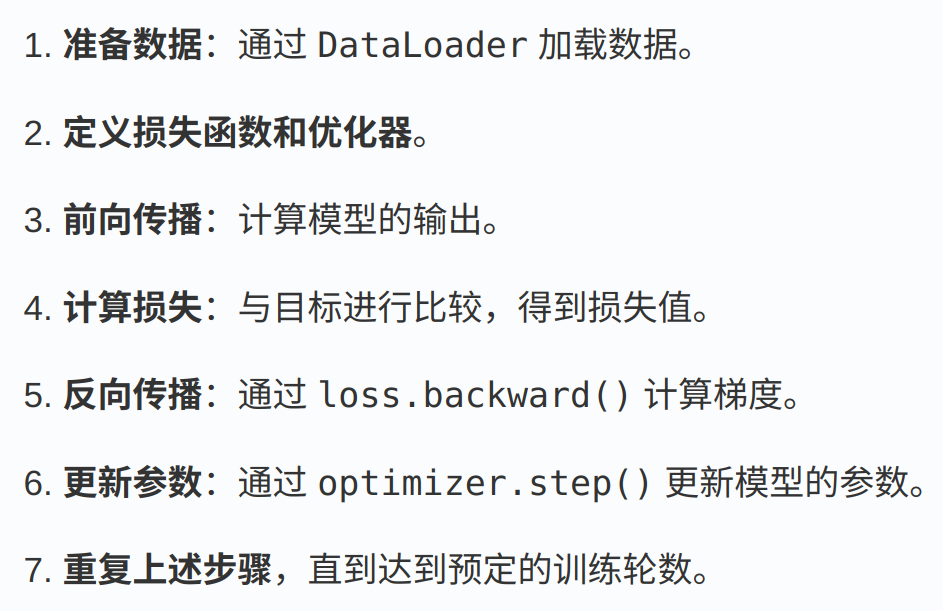

## 测试和评估
训练完成之后, 需要对于模型进行测试和评估, 常见的步骤如下:
- 计算测试集的损失
- 计算准确率

Epoch: [1/50], Loss: 0.2772
Epoch: [2/50], Loss: 0.2770
Epoch: [3/50], Loss: 0.2767
Epoch: [4/50], Loss: 0.2764
Epoch: [5/50], Loss: 0.2762
Epoch: [6/50], Loss: 0.2759
Epoch: [7/50], Loss: 0.2757
Epoch: [8/50], Loss: 0.2754
Epoch: [9/50], Loss: 0.2752
Epoch: [10/50], Loss: 0.2749
Epoch: [11/50], Loss: 0.2746
Epoch: [12/50], Loss: 0.2744
Epoch: [13/50], Loss: 0.2741
Epoch: [14/50], Loss: 0.2739
Epoch: [15/50], Loss: 0.2736
Epoch: [16/50], Loss: 0.2734
Epoch: [17/50], Loss: 0.2731
Epoch: [18/50], Loss: 0.2729
Epoch: [19/50], Loss: 0.2726
Epoch: [20/50], Loss: 0.2724
Epoch: [21/50], Loss: 0.2721
Epoch: [22/50], Loss: 0.2719
Epoch: [23/50], Loss: 0.2716
Epoch: [24/50], Loss: 0.2714
Epoch: [25/50], Loss: 0.2711
Epoch: [26/50], Loss: 0.2709
Epoch: [27/50], Loss: 0.2706
Epoch: [28/50], Loss: 0.2704
Epoch: [29/50], Loss: 0.2701
Epoch: [30/50], Loss: 0.2699
Epoch: [31/50], Loss: 0.2696
Epoch: [32/50], Loss: 0.2694
Epoch: [33/50], Loss: 0.2692
Epoch: [34/50], Loss: 0.2689
Epoch: [35/50], Loss: 0

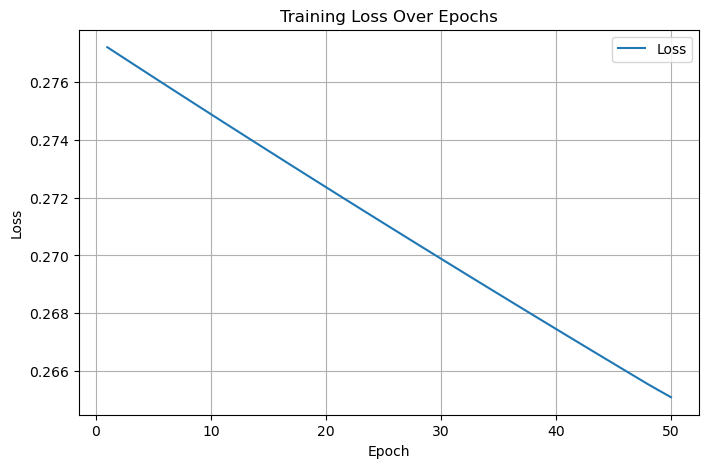

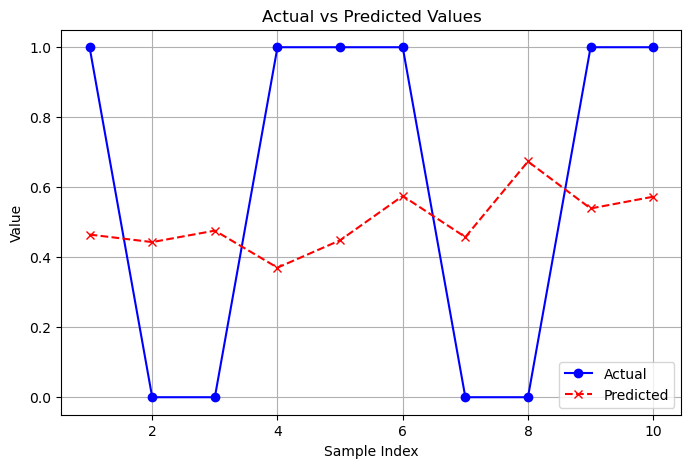

In [10]:
# PyTorch 简单神经网络
# 输入层大小(输入特征数), n_h(隐藏层特征数), n_out(输出特征数) 以及批量大小
n_in, n_h, n_out, batch_size = 10, 5, 1, 10

# 1. 准备数据
X = torch.randn(batch_size, n_in) # batch_size 个样本, 每一个样本 n_in 个特征
Y = torch.tensor([[1.0], [0.0], [0.0],
                 [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0]]) 

# 2. 定义模型
model = nn.Sequential(
    nn.Linear(n_in, n_h),
    nn.ReLU(),
    nn.Linear(n_h, n_out),
    nn.Sigmoid()
)

# 3. 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

losses = []

# 4. 开始训练
for epoch in range(50):
    Y_pred = model(X)
    loss = criterion(Y_pred, Y) # 计算损失
    losses.append(loss.item())
    print(f'Epoch: [{epoch+1}/50], Loss: {loss.item():.4f}') 
    optimizer.zero_grad() # 清除梯度
    loss.backward() # 反向传播
    optimizer.step()  # 更新参数

# 可视化损失变化曲线
plt.figure(figsize=(8, 5))
plt.plot(range(1, 51), losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

# 可视化预测结果与实际目标值对比
y_pred_final = model(X).detach().numpy()  # 最终预测值
y_actual = Y.numpy()  # 实际值

plt.figure(figsize=(8, 5))
plt.plot(range(1, batch_size + 1), y_actual, 'o-', label='Actual', color='blue')
plt.plot(range(1, batch_size + 1), y_pred_final, 'x--', label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid()
plt.show()